<a href="https://colab.research.google.com/github/Archimedes58/Projects/blob/main/Life_Expectancy_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# show all outputs of a cell in a jupyter notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV


# mount the google drive to colab
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
data = pd.read_csv('/content/drive/MyDrive/learning cluster/Life Expectancy Data.csv')

In [4]:
data_2015 = data[data['Year'] == 2015] #keeps the data for only 2015


In [5]:
# Define the list of features to keep
features_to_keep = ['Country', 'Status', 'Hepatitis B', 'Polio', 'Diphtheria ',
                   ' BMI ', ' thinness  1-19 years', 'Alcohol', 'GDP',
                   'percentage expenditure', 'Income composition of resources',
                   'Schooling', 'Life expectancy ']
# Select the desired features and target
selected_data = data_2015[features_to_keep]

# Set the index to 'Country'
selected_data = selected_data.set_index('Country')

In [6]:
#print the first ten rows
print(selected_data.head(10))
#printt the last ten rows
print(selected_data.tail(10))

                         Status  Hepatitis B  Polio  Diphtheria    BMI   \
Country                                                                   
Afghanistan          Developing         65.0    6.0         65.0   19.1   
Albania              Developing         99.0   99.0         99.0   58.0   
Algeria              Developing         95.0   95.0         95.0   59.5   
Angola               Developing         64.0    7.0         64.0   23.3   
Antigua and Barbuda  Developing         99.0   86.0         99.0   47.7   
Argentina            Developing         94.0   93.0         94.0   62.8   
Armenia              Developing         94.0   96.0         94.0   54.9   
Australia             Developed         93.0   93.0         93.0   66.6   
Austria               Developed         93.0   93.0         93.0   57.6   
Azerbaijan           Developing         96.0   98.0         96.0   52.5   

                      thinness  1-19 years  Alcohol           GDP  \
Country                       

In [7]:
#country with the highest life expectancy
highest_life_expectancy_country = selected_data['Life expectancy '].idxmax()
print("Country with highest life expectancy:", highest_life_expectancy_country)

#country with the lowest life expectancy
lowest_life_expectancy_country = selected_data['Life expectancy '].idxmin()
print("Country with lowest life expectancy:", lowest_life_expectancy_country)


Country with highest life expectancy: Slovenia
Country with lowest life expectancy: Sierra Leone


In [8]:
selected_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, Afghanistan to Zimbabwe
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Status                           183 non-null    object 
 1   Hepatitis B                      174 non-null    float64
 2   Polio                            183 non-null    float64
 3   Diphtheria                       183 non-null    float64
 4    BMI                             181 non-null    float64
 5    thinness  1-19 years            181 non-null    float64
 6   Alcohol                          6 non-null      float64
 7   GDP                              154 non-null    float64
 8   percentage expenditure           183 non-null    float64
 9   Income composition of resources  173 non-null    float64
 10  Schooling                        173 non-null    float64
 11  Life expectancy                  183 non-null    float64
dtypes: float64(1

In [9]:
# Get descriptive statistics for numerical features
numerical_stats = selected_data.describe()

# Display the statistics
print(numerical_stats)

       Hepatitis B       Polio  Diphtheria         BMI   \
count   174.000000  183.000000   183.000000  181.000000   
mean     82.425287   83.207650    84.633880   42.754144   
std      24.008492   24.245778    22.162793   20.685702   
min       6.000000    5.000000     6.000000    2.500000   
25%      78.750000   83.000000    83.500000   24.300000   
50%      93.000000   93.000000    93.000000   48.600000   
75%      97.000000   97.000000    97.000000   61.400000   
max      99.000000   99.000000    99.000000   77.600000   

        thinness  1-19 years    Alcohol           GDP  percentage expenditure  \
count             181.000000   6.000000    154.000000              183.000000   
mean                4.534807   5.288333   7185.331746                2.383906   
std                 4.099425   4.038115  11697.508913               27.461032   
min                 0.100000   0.010000     33.681223                0.000000   
25%                 1.500000   2.492500    766.008101          

array([[<Axes: title={'center': 'Hepatitis B'}>,
        <Axes: title={'center': 'Polio'}>,
        <Axes: title={'center': 'Diphtheria '}>],
       [<Axes: title={'center': ' BMI '}>,
        <Axes: title={'center': ' thinness  1-19 years'}>,
        <Axes: title={'center': 'Alcohol'}>],
       [<Axes: title={'center': 'GDP'}>,
        <Axes: title={'center': 'percentage expenditure'}>,
        <Axes: title={'center': 'Income composition of resources'}>],
       [<Axes: title={'center': 'Schooling'}>,
        <Axes: title={'center': 'Life expectancy '}>, <Axes: >]],
      dtype=object)

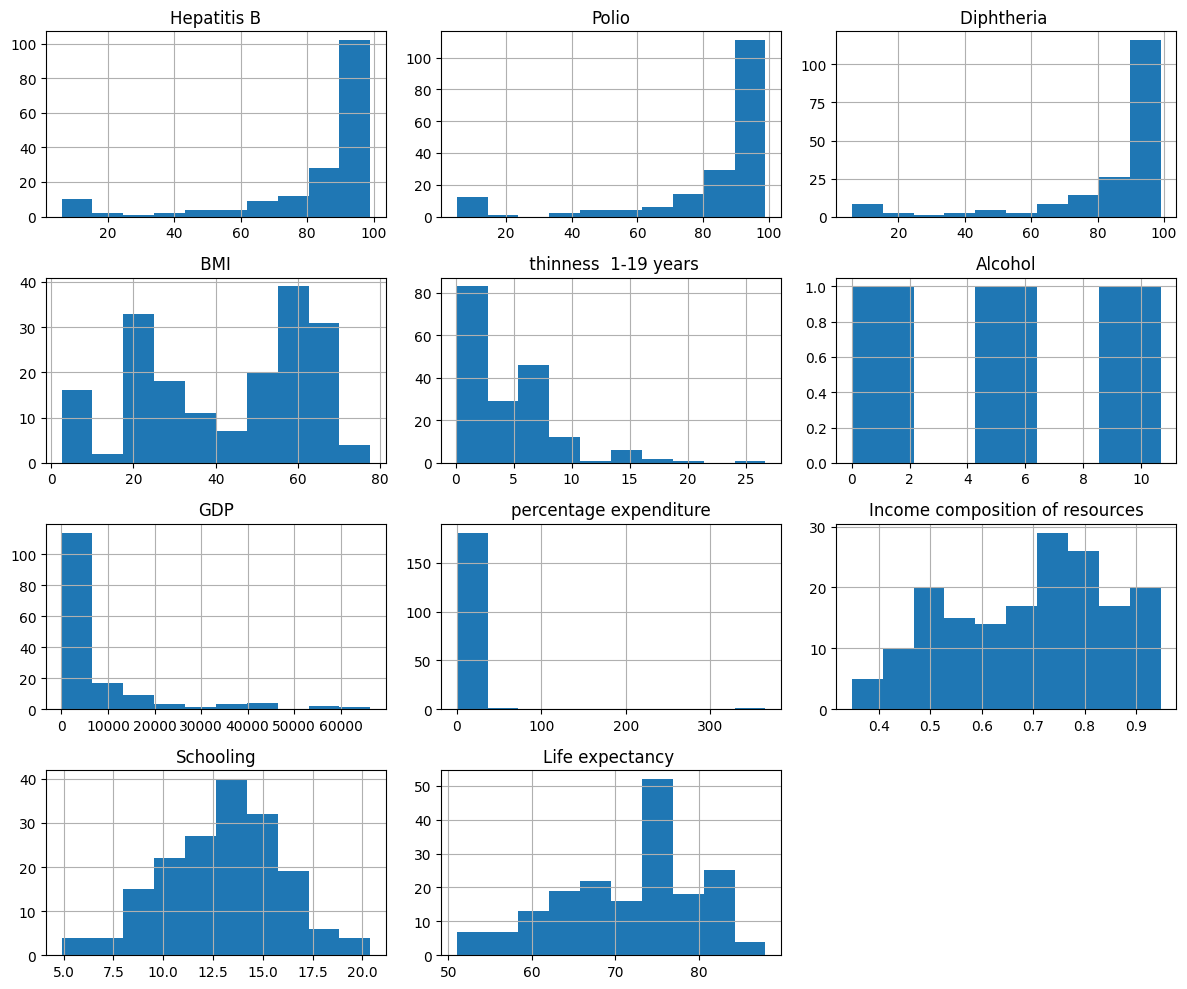

In [10]:
# Plot histograms for numerical features
selected_data.hist(figsize=(12, 10))  # Adjust figsize for better visualization
plt.tight_layout()  # Adjust spacing between subplots
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


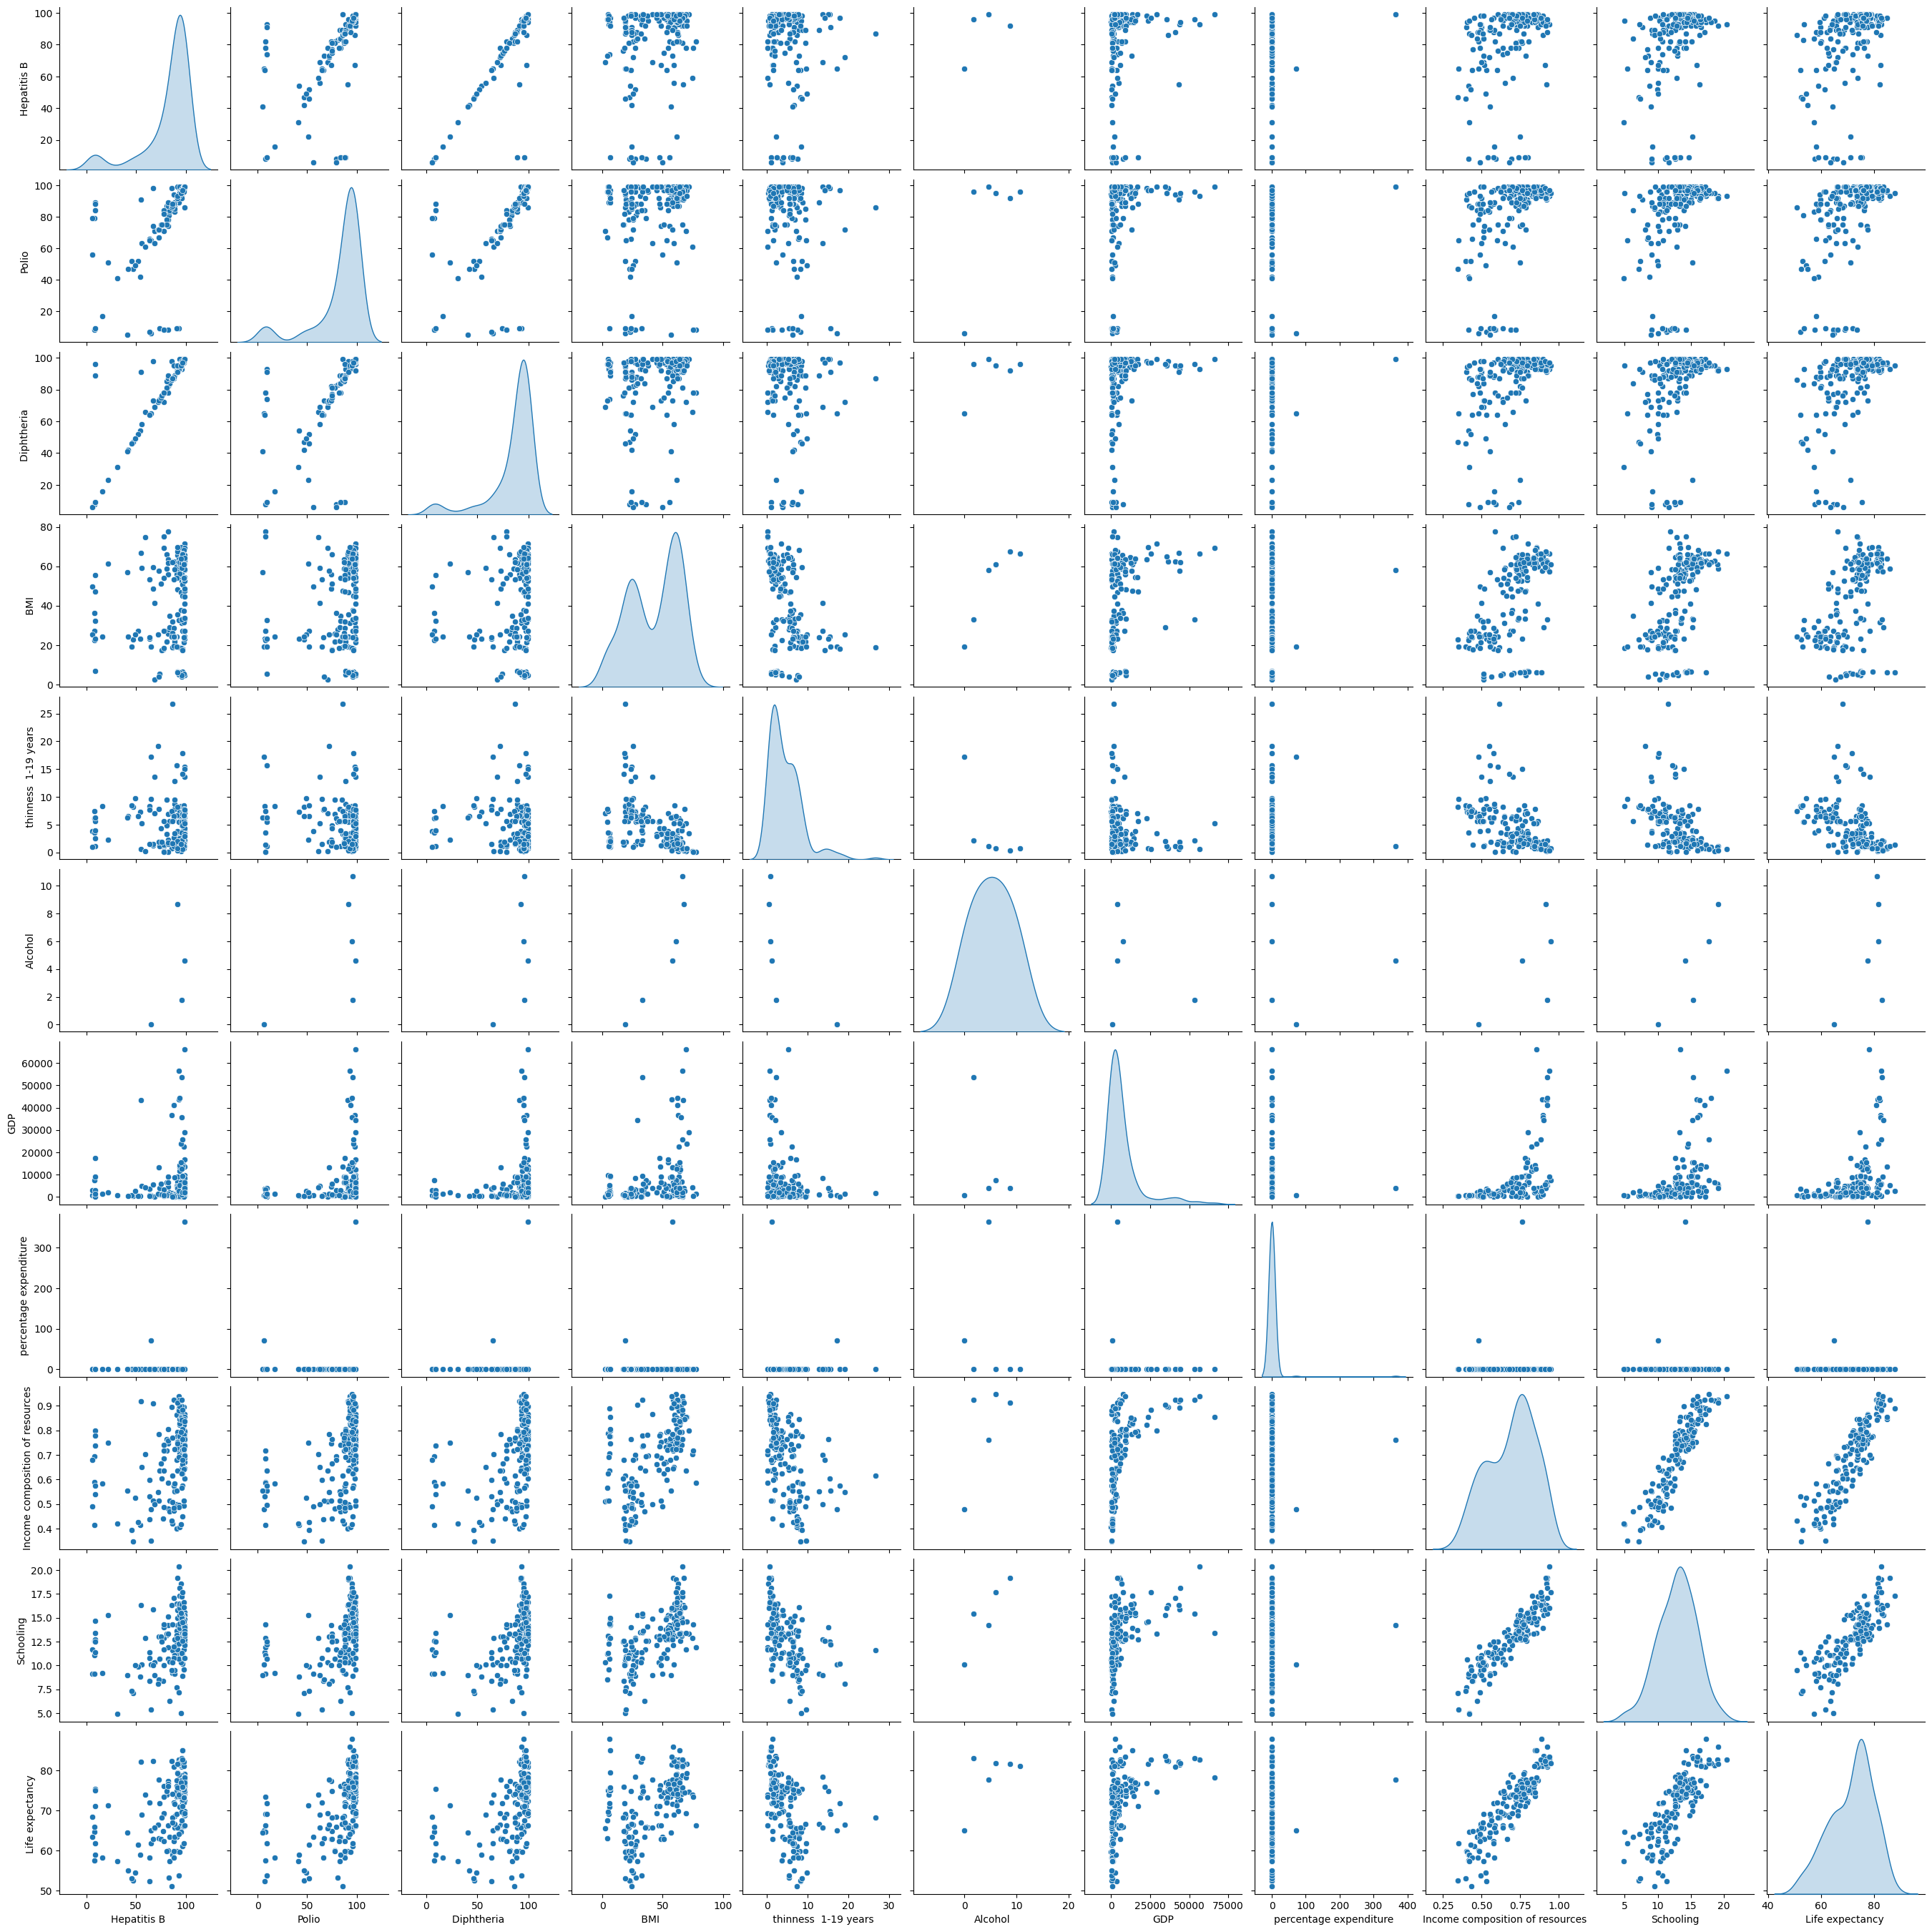

Correlation Matrix:
                                 Hepatitis B     Polio  Diphtheria       BMI   \
Hepatitis B                         1.000000  0.594559     0.915220  0.179551   
Polio                               0.594559  1.000000     0.661635  0.212450   
Diphtheria                          0.915220  0.661635     1.000000  0.197686   
 BMI                                0.179551  0.212450     0.197686  1.000000   
 thinness  1-19 years              -0.057951 -0.194518    -0.113999 -0.472508   
Alcohol                             0.561207  0.619855     0.574532  0.922678   
GDP                                 0.142116  0.241974     0.227705  0.345978   
percentage expenditure              0.041100  0.002150     0.034701  0.037723   
Income composition of resources     0.327169  0.464525     0.431936  0.589784   
Schooling                           0.334051  0.408363     0.410833  0.566204   
Life expectancy                     0.420848  0.515602     0.500300  0.516663   

       

In [11]:
# Calculate the correlation matrix
numerical_features = selected_data.select_dtypes(include=np.number).columns
correlation_matrix = selected_data[numerical_features].corr()

# Plot the scatter matrix using seaborn
sns.pairplot(selected_data, hue=None, diag_kind='kde', kind='scatter', markers='o', size=2.5)
plt.show()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

LinearRegression()

<Figure size 800x600 with 0 Axes>

Text(0.5, 0, 'GDP per capita')

Text(0, 0.5, 'Life Expectancy')

Text(0.5, 1.0, 'Relationship between GDP per capita and Life Expectancy')

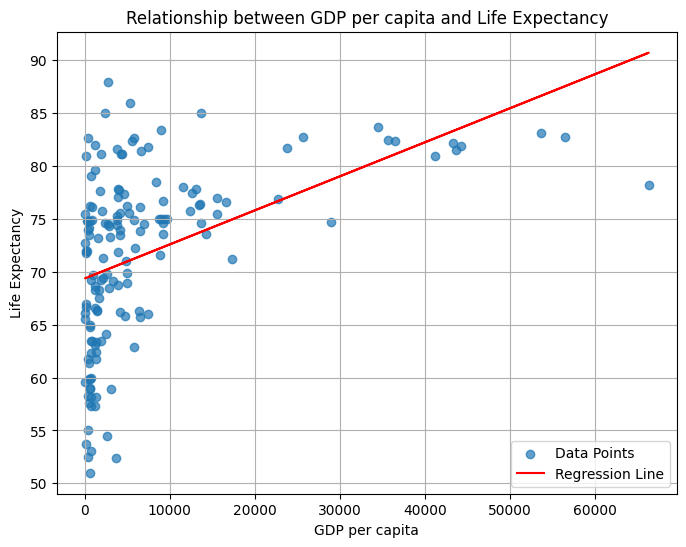

Relationship:
There is a positive correlation between GDP per capita and life expectancy.
As GDP per capita increases, life expectancy tends to increase as well.
The linear regression line shows the general trend of this relationship.


In [12]:
# Extract GDP and Life Expectancy columns
x = selected_data['GDP'].dropna().values.reshape(-1, 1)  # Drop NaN values and reshape for sklearn
y = selected_data['Life expectancy '][selected_data['GDP'].notna()]  # Select corresponding 'Life expectancy ' values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(x, y)
# Predictions for the regression line
y_pred = model.predict(x)

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.7, label='Data Points')  # Scatter plot of data points
plt.plot(x, y_pred, color='red', label='Regression Line')  # Regression line

# Customize the plot
plt.xlabel('GDP per capita')
plt.ylabel('Life Expectancy')
plt.title('Relationship between GDP per capita and Life Expectancy')
plt.legend()
plt.grid(True)

plt.show()

# Print the relationship
print("Relationship:")
print("There is a positive correlation between GDP per capita and life expectancy.")
print("As GDP per capita increases, life expectancy tends to increase as well.")
print("The linear regression line shows the general trend of this relationship.")

In [13]:
# Create a pipeline for numerical features
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Replace missing values with median
    ('scaler', StandardScaler()),  # Standardize the feature
])

# Get numerical features
numerical_features = selected_data.select_dtypes(include=np.number).columns

# Apply the pipeline to numerical features
selected_data[numerical_features] = numerical_pipeline.fit_transform(selected_data[numerical_features])

In [14]:
# Define the numerical and categorical features
numerical_features = selected_data.select_dtypes(include=np.number).columns.tolist()
categorical_features = ['Status']  # Assuming 'Status' is your categorical feature

# Create pipelines for numerical and categorical features
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), # Impute missing values with most frequent value
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore')), # One-hot encode
])

# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features),
    ])

# Apply the preprocessor to your data
processed_data = preprocessor.fit_transform(selected_data)

# Get feature names after transformation
# This is necessary because OneHotEncoder creates new columns
feature_names = numerical_features + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features))

# Create a new DataFrame with the processed data and feature names
processed_df = pd.DataFrame(processed_data, columns=feature_names, index=selected_data.index)

# Now 'processed_df' contains the preprocessed data

In [15]:
# Define features (X) and target (y)
X = selected_data.drop('Life expectancy ', axis=1)  # Features (excluding target)
y = selected_data['Life expectancy ']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the numerical and categorical features
numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_features = ['Status']  # Assuming 'Status' is your categorical feature

# Create pipelines for numerical and categorical features
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore')),
])

# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features),
    ])

# Fit and transform the training data
X_train_processed = preprocessor.fit_transform(X_train)

# Get feature names after transformation
feature_names = numerical_features + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features))

# Create a DataFrame for the processed training data
X_train_processed_df = pd.DataFrame(X_train_processed, columns=feature_names, index=X_train.index)

# Now 'X_train_processed_df' contains the preprocessed training data


In [16]:
# Transform the test data using the fitted preprocessor
X_test_processed = preprocessor.transform(X_test)  # Use transform, not fit_transform

# Get feature names after transformation (same as for training data)
# feature_names = numerical_features + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features))

# Create a DataFrame for the processed test data
X_test_processed_df = pd.DataFrame(X_test_processed, columns=feature_names, index=X_test.index)


In [17]:
# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train_processed_df, y_train)  # Use the processed training data

# Now 'model' is trained on the preprocessed training data

LinearRegression()

In [18]:
# Get predictions for the first 5 rows of the test set
predictions = model.predict(X_test_processed_df.head())

# Print the predictions
print("First five predictions:")
print(predictions)

First five predictions:
[ 0.06673689  0.82119963 -1.05583358 -0.70597311 -0.86191537]


In [19]:
# Predict on the test set
y_pred = model.predict(X_test_processed_df)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print RMSE
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.6029641822471471


In [20]:
# Create a RandomForestRegressor object
rf_model = RandomForestRegressor(random_state=42)  # Set random_state for reproducibility

# Perform 5-fold cross-validation
# scoring='neg_mean_squared_error' because cross_val_score works with negative MSE
cv_scores = cross_val_score(rf_model, X_train_processed_df, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate the mean RMSE
mean_rmse = np.sqrt(-cv_scores.mean())  # Take the square root of the average negative MSE

# Print the mean RMSE
print("Mean RMSE (5-fold cross-validation):", mean_rmse)

Mean RMSE (5-fold cross-validation): 0.49177440971473246


In [21]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Number of trees in the forest
    'max_features': ['sqrt', 'log2', None],  # Number of features to consider when looking for the best split
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_processed_df, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best negative MSE score:", best_score)

# Calculate RMSE from the best negative MSE score
best_rmse = np.sqrt(-best_score)
print("Best RMSE:", best_rmse)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Now you can use 'best_rf_model' for predictions

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='neg_mean_squared_error', verbose=2)

Best parameters: {'max_features': 'sqrt', 'n_estimators': 200}
Best negative MSE score: -0.22391137735116112
Best RMSE: 0.4731927486248718


In [22]:
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters
print("Best Parameters:")
for param_name, param_value in best_params.items():
    print(f"{param_name}: {param_value}")

Best Parameters:
max_features: sqrt
n_estimators: 200


In [23]:
# Get the best model
best_rf_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred_best = best_rf_model.predict(X_test_processed_df)

# Calculate RMSE for the best model
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))

# Print the RMSE
print("RMSE on Test Set (Best Model):", rmse_best)

RMSE on Test Set (Best Model): 0.49287692263234917


In [24]:
# Combine training and test data
X_all = pd.concat([X_train, X_test])
y_all = pd.concat([y_train, y_test])

# Preprocess the combined data (using the same preprocessor fitted on training data)
X_all_processed = preprocessor.transform(X_all)
X_all_processed_df = pd.DataFrame(X_all_processed, columns=feature_names, index=X_all.index)

# Fit the best model on the entire dataset
best_rf_model.fit(X_all_processed_df, y_all)

# Get feature importances
importances = best_rf_model.feature_importances_

# Create a DataFrame for feature importances and names
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print(feature_importances_df)

# Get the top three features
top_three_features = feature_importances_df.head(3)['Feature'].tolist()
print("\nTop three features:", top_three_features)

RandomForestRegressor(max_features='sqrt', n_estimators=200, random_state=42)

                            Feature  Importance
8   Income composition of resources    0.269824
9                         Schooling    0.180682
1                             Polio    0.120784
4              thinness  1-19 years    0.116370
3                              BMI     0.095827
2                       Diphtheria     0.091091
0                       Hepatitis B    0.047925
6                               GDP    0.039353
11                Status_Developing    0.018889
10                 Status_Developed    0.018345
5                           Alcohol    0.000655
7            percentage expenditure    0.000255

Top three features: ['Income composition of resources', 'Schooling', 'Polio']
